# Exploratory Data Analysis (EDA) on Product Dataset

In this notebook, we will perform an Exploratory Data Analysis (EDA) to explore the product dataset and gain a better understanding of its structure. Our goal is to clean the data as needed and analyze the distribution of variables.

To start, we will first import the necessary packages for working with this dataset.


In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [24]:
main_df = pd.read_csv('data/train.tsv', sep= '\t')
main_df.head()

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NaN,10.0,1,No description yet
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...
3,3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,NaN,35.0,1,New with tags. Leather horses. Retail for [rm]...
4,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,NaN,44.0,0,Complete with certificate of authenticity


## Understanding the Dataset  

Our dataset contains **8 columns** in total. Among them:  

- **2 columns are not useful as features:**  
  - `price` → This is our target variable (`y`), which we will predict.  
  - `train_id` → A simple ID number that won’t contribute to our predictions.  

- **6 columns can be used as features:**  
  - These will serve as input for our model.  
  - Some of them include **names and descriptions**, which can be interpreted by our model using **Natural Language Processing (NLP)**.  

Hopefully, these features will provide enough information for our predictions.  



In [25]:
main_df.columns

Index(['train_id', 'name', 'item_condition_id', 'category_name', 'brand_name',
       'price', 'shipping', 'item_description'],
      dtype='object')

In [26]:
main_df.shape

(1482535, 8)

In [27]:
#Checking how many different values we have for 'item_condition_id' 
main_df['item_condition_id'].unique()

array([3, 1, 2, 4, 5])

## Understanding Price Ranges  

To analyze the **minimum and maximum values** of prices in our dataset, we will:  

- Determine the range of prices we can expect.  
- Set boundaries for the types of products we will include in our price predictions.  

This step helps us understand the dataset's distribution and ensure our model focuses on relevant products.  


In [28]:
#Checking min and max prices to understand what range of prices we can expect for this dataset.

max_price = main_df['price'].max()
min_price = main_df['price'].min()

print(f'Minimum price in the dataset: {min_price}')
print(f'Maximum price in the dataset: {max_price}')

Minimum price in the dataset: 0.0
Maximum price in the dataset: 2009.0


## Checking Data Types and Missing Values  

In this step, we will:  

- Verify the **data types** of each column.  
- Identify **null values** in the dataset.  

We can see that the **'brand_name'** column has a significant number of missing values. While we will need to address these missing values later, for now, we will work with a **sample dataset** instead of the full dataset (`main_df`).  

Since `main_df` contains a large number of rows, using a smaller sample will help reduce memory usage and computational load.  


In [29]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1482535 entries, 0 to 1482534
Data columns (total 8 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   train_id           1482535 non-null  int64  
 1   name               1482535 non-null  object 
 2   item_condition_id  1482535 non-null  int64  
 3   category_name      1476208 non-null  object 
 4   brand_name         849853 non-null   object 
 5   price              1482535 non-null  float64
 6   shipping           1482535 non-null  int64  
 7   item_description   1482529 non-null  object 
dtypes: float64(1), int64(3), object(4)
memory usage: 90.5+ MB


In [30]:
sample_df = main_df.sample(frac=0.04, random_state=42)
sample_df.shape

(59301, 8)

## Handling Missing Values  

Now that we have **`sample_df`**, let's:  

- Take a closer look at the **null values** in this subset.  
- Decide how to handle them effectively.  

Addressing missing values at this stage will help improve data quality before proceeding with further analysis.  


In [31]:
sample_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 59301 entries, 777341 to 518666
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   train_id           59301 non-null  int64  
 1   name               59301 non-null  object 
 2   item_condition_id  59301 non-null  int64  
 3   category_name      59063 non-null  object 
 4   brand_name         34172 non-null  object 
 5   price              59301 non-null  float64
 6   shipping           59301 non-null  int64  
 7   item_description   59301 non-null  object 
dtypes: float64(1), int64(3), object(4)
memory usage: 4.1+ MB


In [32]:
sample_df.isna().sum()


train_id                 0
name                     0
item_condition_id        0
category_name          238
brand_name           25129
price                    0
shipping                 0
item_description         0
dtype: int64

In [33]:
sample_df.isna().mean()

train_id             0.000000
name                 0.000000
item_condition_id    0.000000
category_name        0.004013
brand_name           0.423753
price                0.000000
shipping             0.000000
item_description     0.000000
dtype: float64

## Visualizing Missing Values  

After analyzing the **absolute values and proportions** of missing data in `sample_df`, the next step is to **visualize** their distribution across the dataset.  

This will help us understand patterns in the missing values and decide on the best approach to handle them.  


<Axes: >

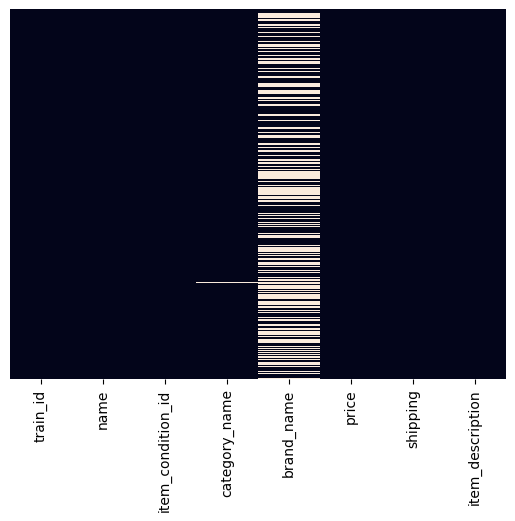

In [34]:
sns.heatmap(sample_df.isnull(),
            yticklabels=False,
            cbar=False)

## Dropping Rows with Null Values  

We will remove rows with missing values because:  

- Most missing values are in **'brand_name'** and **'category_name'**, and we cannot generate that information.  
- Since the full dataset contains a large number of rows, dropping some will not significantly impact our analysis.  

This ensures we work with cleaner and more reliable data.  


In [35]:
#Dropping Null value rows because the most part is as brand name and we cant make that information up. because we have a vary large amout of rowsin the full dataset we can afford to loose some rows

sample_df = sample_df.dropna()


## Checking for Duplicate Rows  

After reviewing the dataset, we can confirm that **there are no duplicate rows**.  

Since duplicates are not an issue, we don’t need to take any further action in this step.  


In [36]:
sample_df.duplicated().sum()

0

In [37]:
sample_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34070 entries, 1463629 to 518666
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   train_id           34070 non-null  int64  
 1   name               34070 non-null  object 
 2   item_condition_id  34070 non-null  int64  
 3   category_name      34070 non-null  object 
 4   brand_name         34070 non-null  object 
 5   price              34070 non-null  float64
 6   shipping           34070 non-null  int64  
 7   item_description   34070 non-null  object 
dtypes: float64(1), int64(3), object(4)
memory usage: 2.3+ MB


## Analyzing Variable Distributions  

For the variables where it makes sense to analyze their distribution, we will **plot graphs** to visualize how they are spread across the dataset.  

To do this, we will first **create a new dataframe** that includes only the relevant columns by dropping those that are not needed.  


In [38]:
# Dropping price because it's my y variable and train_id because it doesn't have any meaning for our analysis
plot_columns_distribution = sample_df.drop(['train_id', 'name', 'category_name', 'item_description'], axis=1)

In [41]:
sample_df['shipping'].value_counts(normalize=True)

shipping
0    0.614822
1    0.385178
Name: proportion, dtype: float64

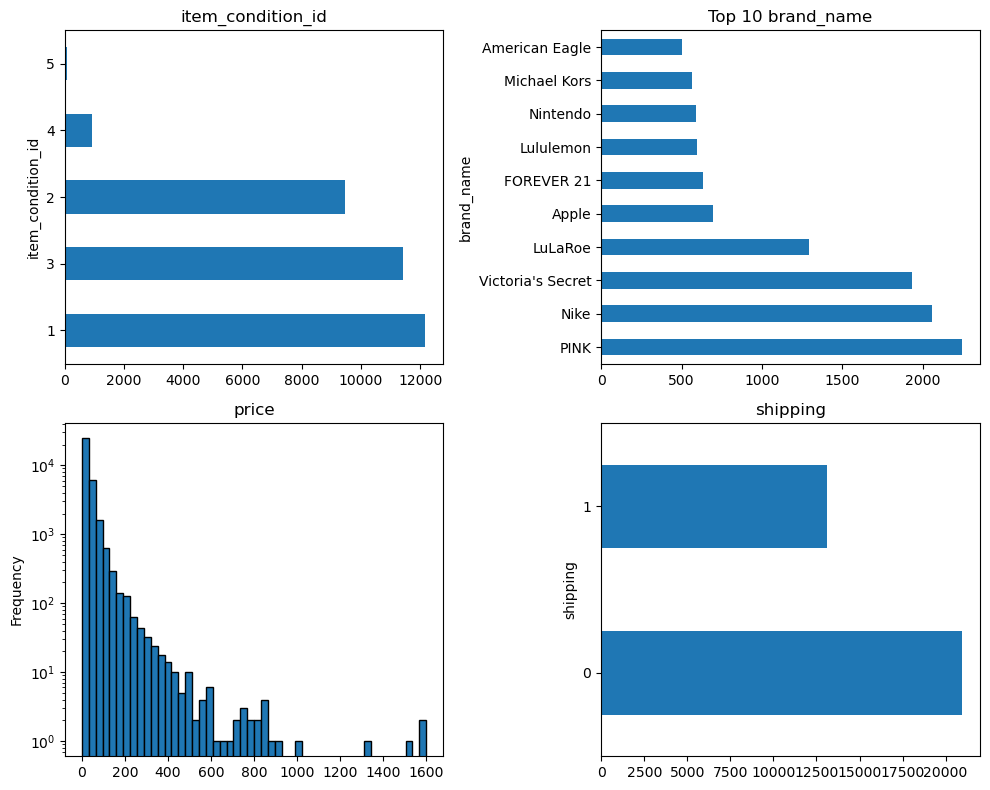

In [39]:
# Specify subplot dimensions 
nrows = 2
ncols = 2

# Create "subplot" grid 
plt.subplots(nrows, ncols, figsize=(10, 8))

# Loop through positions and add plots 
for i, col in enumerate(plot_columns_distribution.columns): 
    plt.subplot(nrows, ncols, i + 1)
    
    if col == 'price':  
        # Plot histogram for price with a log scale
        sample_df[col].plot(kind='hist', bins=50, edgecolor='black', log=True).set_title(col) 
    
    elif col == 'brand_name':  
        # Plot only the top 10 most frequent brands
        sample_df[col].value_counts().nlargest(10).plot(kind='barh').set_title(f'Top 10 {col}')
    
    else:
        # Default bar plot for other categorical variables
        sample_df[col].value_counts().plot(kind='barh').set_title(col)

plt.tight_layout()
plt.show()



## Understanding Variable Distributions  

These plots help us analyze how certain variables are distributed within the dataset:  

### 1️⃣ **`item_condition_id` Distribution**  
- Most items fall under **conditions 1, 3, and 2**, in that order.  
- **Conditions 4 and 5** have significantly fewer items listed.  

### 2️⃣ **`price` Distribution**  
- Although the **maximum price** in the dataset reaches **$2000**, most prices are **under $600**.  
- This insight helps us understand the price distribution and set realistic expectations for price predictions.  

### 3️⃣ **`shipping` Distribution**  
- The majority of shipments are **paid by buyers (`0`)**.  
- However, a **significant portion is also covered by sellers (`1`)**, showing that sellers often take on shipping costs.  

### 4️⃣ **`brand_name` Distribution**  
- We selected the **top 10 brands with the highest sales** to see which brands dominate the dataset.  
- These **popular brands might also influence pricing**, as well-known brands tend to sell at higher prices.  
- This could be an important factor in our price prediction model.  


<Figure size 1000x600 with 0 Axes>

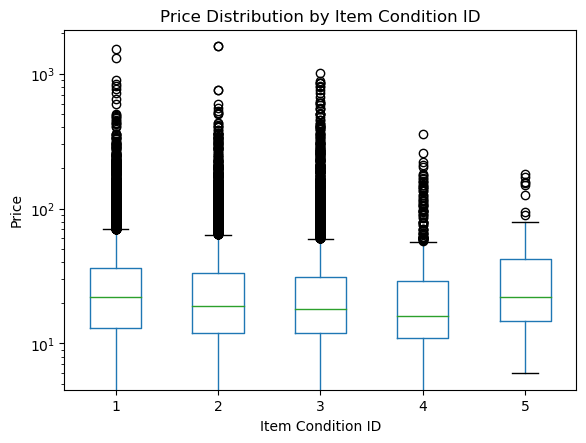

In [54]:
plt.figure(figsize=(10, 6))
sample_df.boxplot(column="price", by="item_condition_id", grid=False)
plt.title("Price Distribution by Item Condition ID")
plt.suptitle("")  # Remove automatic title
plt.xlabel("Item Condition ID")
plt.ylabel("Price")
plt.yscale("log")  # Log scale to handle outliers
plt.show()

<Figure size 800x500 with 0 Axes>

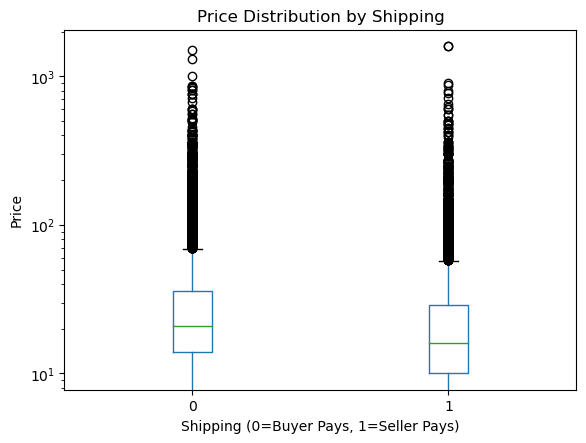

In [50]:
plt.figure(figsize=(8, 5))
sample_df.boxplot(column="price", by="shipping", grid=False)
plt.title("Price Distribution by Shipping")
plt.suptitle("")  # Remove automatic title
plt.xlabel("Shipping (0=Buyer Pays, 1=Seller Pays)")
plt.ylabel("Price")
plt.yscale("log")  # Log scale to handle outliers
plt.show()

### Analyzing Price by Item Condition and Shipping  

We plotted boxplots to check if **item_condition_id** and **shipping** had a clear impact on price. However, the results show **no strong pattern**:  
- The **median price remains nearly the same** across different condition levels and shipping options.  
- The **price distribution does not show significant variation** when grouped by these two columns.  

Since no clear trends emerged, let’s now analyze **price distribution by brand** to see if we can identify more distinct patterns.  


<Figure size 1200x600 with 0 Axes>

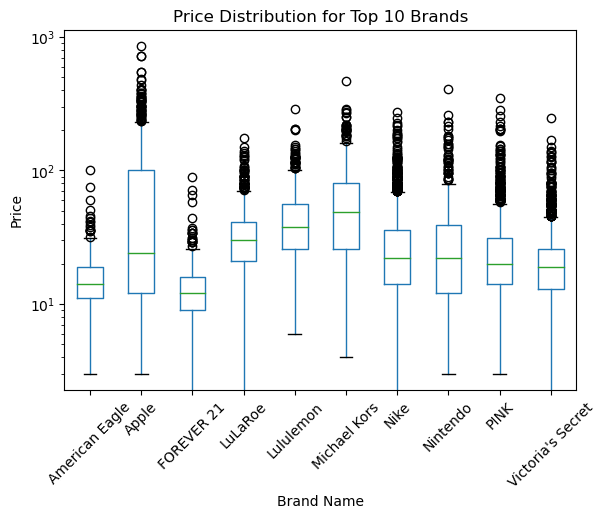

In [53]:
top_10_brands = sample_df['brand_name'].value_counts().nlargest(10).index

# Filter dataset to include only top 10 brands
df_top_brands = sample_df[sample_df['brand_name'].isin(top_10_brands)]

# Create a boxplot for price distribution per top brand
plt.figure(figsize=(12, 6))
df_top_brands.boxplot(column='price', by='brand_name', grid=False)
plt.xticks(rotation=45)  # Rotate x labels for readability
plt.title("Price Distribution for Top 10 Brands")
plt.suptitle("")  # Remove default title
plt.xlabel("Brand Name")
plt.ylabel("Price")
plt.yscale("log")  # Log scale to better visualize price differences
plt.show()

### Price Trends for Top 10 Brands

- **Apple has the highest price variation** with many high-priced outliers, meaning some Apple products are significantly more expensive than most other brands.
- **Lululemon, Michael Kors, Nike, and Nintendo** also have higher median prices compared to others, showing that these brands generally sell at higher price points.
- **Forever 21 and American Eagle** have lower median prices, indicating they are more affordable brands.
- **Most brands have a lot of outliers**, meaning there are a few expensive products even in typically lower-priced brands.
- **The log scale helps show price differences more clearly**, as some brands have extreme outliers that would otherwise dominate the chart.

This analysis suggests that brand plays a significant role in pricing, with premium brands like **Apple and Michael Kors** tending to have higher price ranges.


<Figure size 1200x600 with 0 Axes>

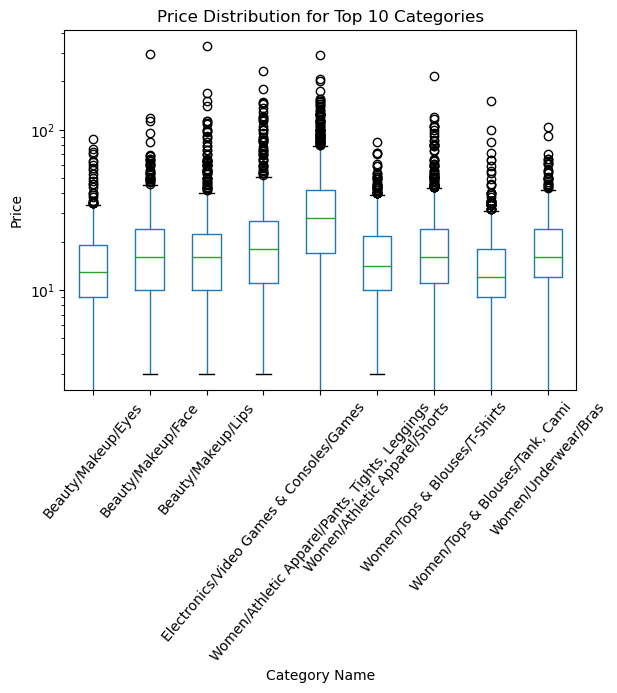

In [58]:
top_9_categories = sample_df['category_name'].value_counts().nlargest(9).index

# Filter dataset to include only the top 10 categories
df_top_categories = sample_df[sample_df['category_name'].isin(top_9_categories)]

# Create a boxplot for price distribution per category
plt.figure(figsize=(12, 6))
df_top_categories.boxplot(column='price', by='category_name', grid=False)
plt.xticks(rotation=50)  # Rotate x labels for readability
plt.title("Price Distribution for Top 10 Categories")
plt.suptitle("")  # Remove default title
plt.xlabel("Category Name")
plt.ylabel("Price")
plt.yscale("log")  # Log scale to handle outliers
plt.show()


### Insights from Price Distribution by Categories and Brands  

From the **boxplots of price distribution by brand and category**, we can observe clearer trends compared to our previous plots for **item condition** and **shipping**:  
- Different brands and categories show **distinct price patterns**, indicating a stronger relationship between these text-based features and price.  
- In contrast, **item condition and shipping did not show significant impact on price**, as their distributions were similar across different values.  
- This suggests that **text features (brand, category, product descriptions, etc.) may be more influential in price determination**.  

These findings highlight the **importance of NLP (Natural Language Processing)** for this dataset. Analyzing product descriptions, brand names, and categories using NLP techniques could provide valuable insights for predicting price and understanding pricing trends.
